<a href="https://colab.research.google.com/github/MagicMoleMM/DistFitter/blob/main/07_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.spatial.distance import euclidean

c1 = [1.0,1.5]
c2 = [-1.0,-.5]

dist = euclidean(c1,c2)
dist

2.8284271247461903

In [1]:
import numpy as np
import  pickle

with open('/content/drive/MyDrive/Colab Notebooks/Файлы для обучения/clustering.pkl','rb') as f:
  data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])


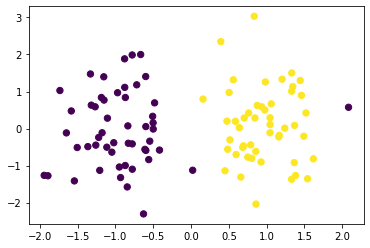

In [2]:

from matplotlib import pyplot as plt
%matplotlib inline 

plt.scatter(X[:,0], X[:,1], s=40, marker='o', c=Y)

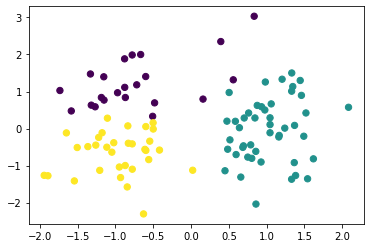

In [3]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_model.fit(X)

plt.scatter(X[:,0], X[:,1], s=40, marker='o', c=kmeans_model.labels_)

In [4]:
from sklearn.metrics.pairwise import euclidean_distances

metrics = []
MAX_CLASTERS = 7

for cluster_num in range(1, MAX_CLASTERS):
  kmeans_model = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
  centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
  metric = 0
  for centroid_label in range(cluster_num):
    metric += euclidean_distances(
        X[labels==centroid_label],
        centroids[centroid_label,:].reshape(1,-1)
    ).sum(axis=0)[0]
  print(f'cluster_num {cluster_num}, metric {metric}')
  metrics.append(metric)




cluster_num 1, metric 135.92762259869988
cluster_num 2, metric 92.34245055263457
cluster_num 3, metric 74.52323397050206
cluster_num 4, metric 60.75176580321338
cluster_num 5, metric 54.86662031054898
cluster_num 6, metric 49.745770433790256


In [5]:
from scipy.spatial import distance

In [22]:
def random_centroid_selection(X, n, k):
  result = []
  random_selection = np.random.randint(0,n,size=k)
  for obj_id in random_selection:
    result.append(X[obj_id, :])
  return result

def eval_weight_evolution(centroid_objects_prev, centroid_objects, k):
  result = []
  for i in range(0,k):
    dist = distance.euclidean(
        centroid_objects_prev[i],
        centroid_objects[i]
    )
    result.append(dist)
  return result

def eval_cluster_labels(X, centroid_objects):
  cluster_distance =euclidean_distances(X, centroid_objects)
  cluster_labels = cluster_distance.argmin(axis=1)
  return cluster_labels

def eval_centroids(X, k, cluster_labels):
  result = []
  for i in range(k):
    new_centroid = X[cluster_labels==i].mean(axis=0)
    result.append(new_centroid)
  return result


Step 0, weight_evolution [1.0167903175240187, 0.701604317612289]
Step 1, weight_evolution [0.22014171305624555, 0.22334876253680938]
Step 2, weight_evolution [0.066669267461226, 0.06666926746122605]
Step 3, weight_evolution [0.0, 0.0]


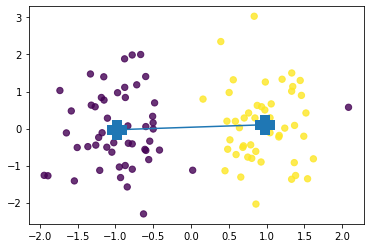

In [44]:
def k_means(X:np.array, k: int=2, eps: float=0.001, num_iteration: int=10):
  centroids, cluster_label = None, None
  try:
    n,m = X.shape
  except ValueError:
    print("Передан некорректный объект X")
  centroid_objects_prev = [np.zeros(m) for i in range (k)]
  centroid_objects = random_centroid_selection(X, n, k)
  weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
  step = 0
  while step < num_iteration and sum(weight_evolution[i] > eps for i in range(k))!=0:
    centroid_objects_prev = centroid_objects.copy()
    cluster_labels = eval_cluster_labels(X, centroid_objects)
    centroid_objects = eval_centroids(X, k, cluster_labels)
    weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
    print(f'Step {step}, weight_evolution {weight_evolution}')
    step += 1
  return np.vstack(centroid_objects),cluster_label

centroids, cluster_label = k_means(X, k=2, num_iteration=10)

plt.scatter(X[:,0], X[:,1], s=40, marker='o', alpha=0.8, c=Y)
plt.plot(centroids[:,0],centroids[:,1],marker='+', mew=10, ms=20)


In [45]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

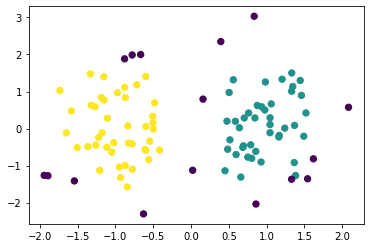

In [46]:
labels = db.labels_
plt.scatter(X[:,0], X[:,1], s=40, marker='o', c=labels)
